<a id='Contents'></a>
# Matplotlib Examples  
These examples are mostly from the matplotlib documentation  
-MDE 2/3/2020

---

### Contents  
- [One Subplot](#Single)  
- [Stacking Subplots in One Direction](#One-Stack)  
- [Stacking Subplots in Two Directions](#Two-Stack)  
- [Sharing Axes](#Sharing)  
- [Polar Axes](#Polar)  
- [Color Space](#Color-Space)  
- [Plot Types](#Plot-Types)  
- [Twin Axes](#Twin-Axes)  
- [Multiple Y-Axis with Spines](#Multiple-Yaxis)  
- [Tick Formatters](#Tick-Formatters)  
- [Anatomy of a Figure](#Anatomy)  
- [Integral Example](#Integral-Example)
  
[To-Do List](#ToDo)

---

## Imports and Data for Most Examples

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import numpy as np
import datetime as dt
%matplotlib inline

# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x **2)
y2 = np.exp(x)

[Return to Top](#Contents)  
<a id='Single'></a>
## A figure with just one subplot
**subplots()** without arguments returns a _Figure_ and a single _Axes_.  
  
This is actually the simplest and recommended way of creating a single Figure and Axes.

Text(0.5, 1.0, 'A single plot')

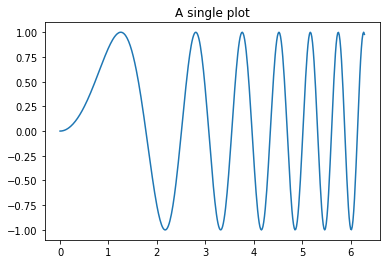

In [2]:
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_title('A single plot')

[Return to Top](#Contents)  
<a id='One-Stack'></a>  
## Stacking subplots in one direction
The first two optional arguments of **pyplot.subplots** define the number of rows and columns of the subplot grid.  

When stacking in one direction only, the returned **axs** is a 1D numpy array containing the list of created Axes.


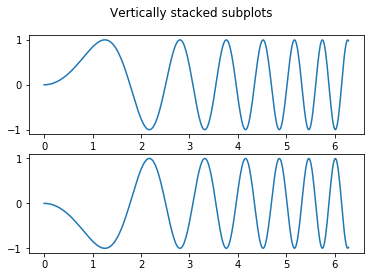

In [3]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x,y)
axs[1].plot(x,-y)

If you are creating just a few Axes, it's handy to unpack them immediately to dedicated variables ro each Axes.  That way, we can use **ax1** instead of the more verbose **axs[0]**.

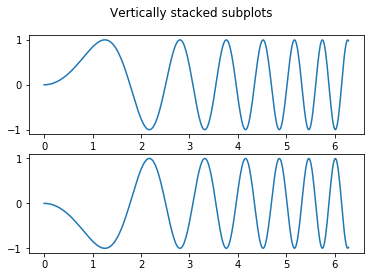

In [4]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
ax1.plot(x, y)
ax2.plot(x, -y)

To obtain side-by-side subplots, pass parameters 1, 2 for one row and two columns.

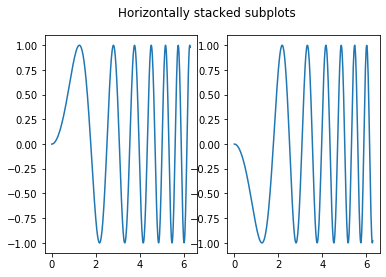

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(x, y)
ax2.plot(x, -y)

[Return to Top](#Contents)  
<a id='Two-Stack'></a>  
## Stacking subplots in two directions
When stacking in two directions, the returned **axs** is a 2D NumPy array.  

If you have to set parameters for each subplot, it's handy to iterate over all subplots in a 2D grid using **for ax in axs.flat:**

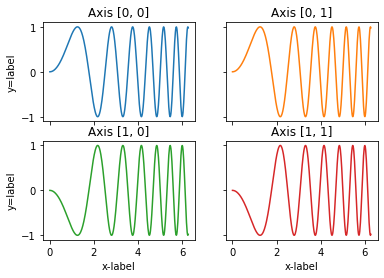

In [6]:
fig, axs = plt.subplots(2,2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y=label')
    
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

You can use tuple-unpacking also in 2D to assign all subplots to dedicated variables:

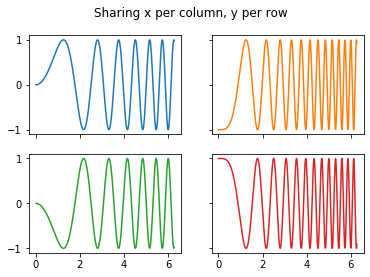

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Sharing x per column, y per row')
ax1.plot(x, y)
ax2.plot(x, y**2, 'tab:orange')
ax3.plot(x, -y, 'tab:green')
ax4.plot(x, -y**2, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()

[Return to Top](#Contents)  
<a id='Sharing'></a>  
## Sharing axes
By default, each Axes is scaled individually.  Thus, if the ranges are different, the tick values of the subplots do not align.

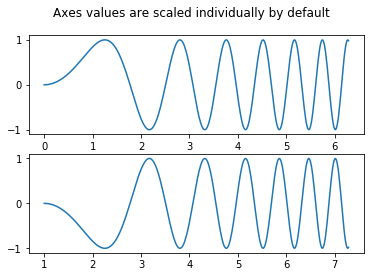

In [8]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Axes values are scaled individually by default')
ax1.plot(x, y)
ax2.plot(x + 1, -y)

You can use **sharex** or **sharey** to align the horizontal or vertical axes.

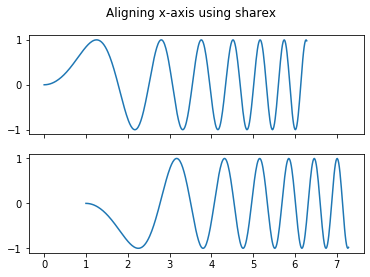

In [9]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Aligning x-axis using sharex')
ax1.plot(x, y)
ax2.plot(x + 1, -y)

Setting _sharex_ or _sharey_ to _True_ enables global sharing across the whole grid, i.e. also the y-axes of vertically stacked subplots have the same scale when using _sharey=True_.

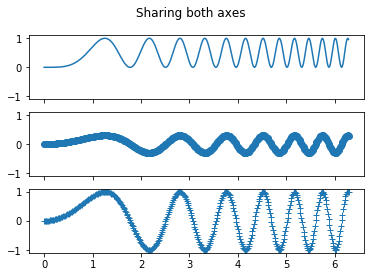

In [10]:
fig, axs = plt.subplots(3, sharex=True, sharey=True)
fig.suptitle('Sharing both axes')
axs[0].plot(x, y ** 2)
axs[1].plot(x, 0.3 * y, 'o')
axs[2].plot(x, y, '+')

For subplots that are sharing axes one set of tick labels is enough.  Tick labels of inner Axes are automatically removed by _sharex_ and _sharey_.  Still there remains an unused empty space between the subplots.  

The parameter **gridspec_kw** of **pyplot.subplots** controls the grid properties (see also **GridSpec**).  For example, we can reduce the height between vertical subplots using _gridspec_kw={'hspace': 0}_.  

**label_outer** is a handy method to remove labels and ticks from subplots that are not at the edge of the grid.

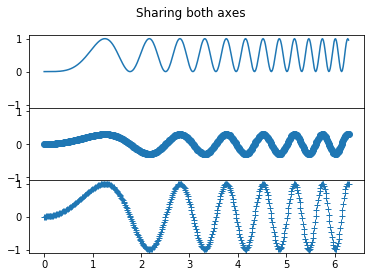

In [11]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, gridspec_kw={'hspace':0})
fig.suptitle('Sharing both axes')
axs[0].plot(x, y ** 2)
axs[1].plot(x, 0.3 * y, 'o')
axs[2].plot(x, y, '+')

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()

Apart from _True_ and _False,_ both _sharex_ and _sharey_ accept the values 'row' and 'col' to share the values only per row or column.

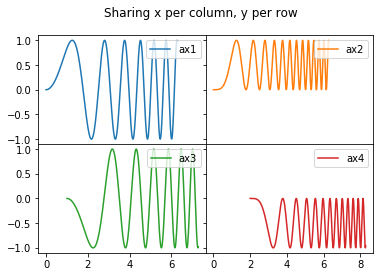

In [15]:
fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', 
                        gridspec_kw={'hspace': 0, 'wspace': 0})
(ax1, ax2), (ax3, ax4) = axs

fig.suptitle('Sharing x per column, y per row')
ax1.plot(x, y, label='ax1')
ax2.plot(x, y**2, 'tab:orange', label='ax2')
ax3.plot(x + 1, -y, 'tab:green', label='ax3')
ax4.plot(x + 2, -y**2, 'tab:red', label='ax4')

for ax in [ax1, ax2, ax3, ax4]:
    ax.legend(loc='upper right')
    ax.label_outer()

                           

[Return to Top](#Contents)  
<a id='Polar'></a>  
## Polar Axes
The parameter **subplot_kw** of _pyplot.subplots_ controls the subplot properties (see also _Figure.add_subplot_ ). In particular, this can be used to create a grid of polar Axes.

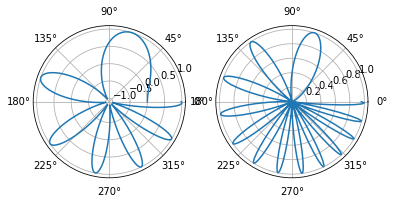

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw=dict(projection='polar'))
ax1.plot(x, y)
ax2.plot(x, y ** 2)

plt.show()

[Return to Top](#Contents)  
<a id='Color-Space'></a>  
## Color Space

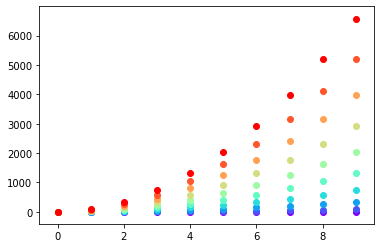

In [14]:
# Color Space

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

u = np.arange(10)
ys = [i+u+(i*u)**2 for i in range(10)]
colors = iter(cm.rainbow(np.linspace(0, 1, len(ys))))
for v in ys:
    plt.scatter(u, v, color=next(colors))
plt.show()

[Return to Top](#Contents)  
<a id='Plot Types'></a>  
## Plot Types

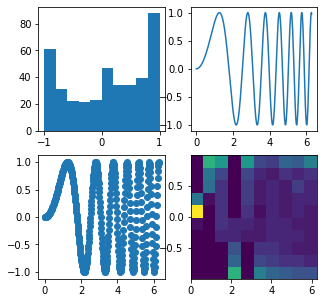

In [24]:
# Other types of plots
fix, axs = plt.subplots(2, 2, figsize=(5,5))
axs[0, 0].hist(y)
axs[1, 0].scatter(x, y)
axs[0, 1].plot(x, y)
axs[1, 1].hist2d(x,y)

plt.show()

[Return to Top](#Contents)  
<a id='Twin-Axes'></a>  
## Twin Axes

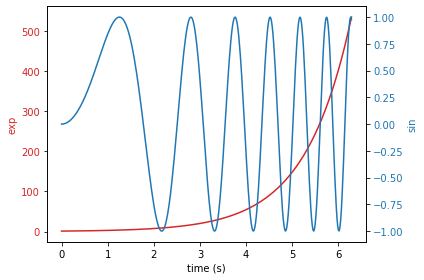

In [17]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(x, y2, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() #instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)   # X-label is already covered by ax1
ax2.plot(x, y, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

[Return to Top](#Contents)  
<a id='Multiple-Yaxis'></a>  
## Multiple Yaxis with Spines

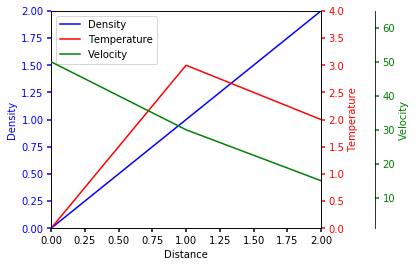

In [18]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1, = host.plot([0, 1, 2], [0, 1, 2], "b-", label="Density")
p2, = par1.plot([0, 1, 2], [0, 3, 2], "r-", label="Temperature")
p3, = par2.plot([0, 1, 2], [50, 30, 15], "g-", label="Velocity")

host.set_xlim(0, 2)
host.set_ylim(0, 2)
par1.set_ylim(0, 4)
par2.set_ylim(1, 65)

host.set_xlabel("Distance")
host.set_ylabel("Density")
par1.set_ylabel("Temperature")
par2.set_ylabel("Velocity")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

[Return to Top](#Contents)  
<a id='Tick-Formatters'></a>  
## Tick Formatters
From: [matplotlib.org](https://matplotlib.org/3.2.2/gallery/ticks_and_spines/tick-formatters.html "matplotlib")

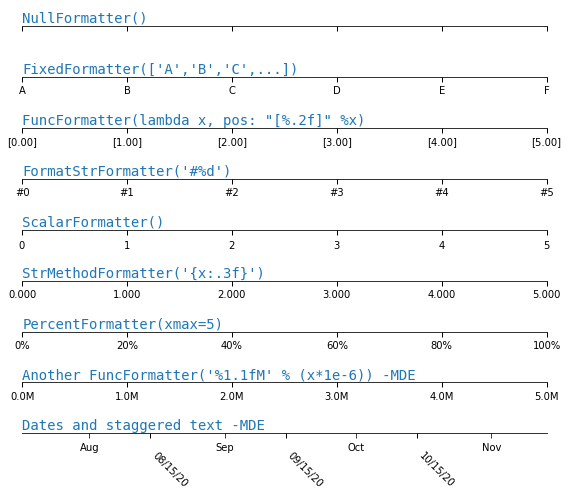

In [83]:

def setup(ax, title):
    """Set up common parameters for the Axes in the example."""
    # only show the bottom spine
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['top'].set_color('none')
    
    # define tick positions
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00, length=5)
    ax.tick_params(which='minor', width=0.75, length=5)
    ax.set_xlim(0,5)
    ax.set_ylim(0,1)
    ax.text(0.0, 0.2, title, transform=ax.transAxes,
           fontsize=14, fontname='Monospace', color='tab:blue')
    
fig, axs = plt.subplots(9, 1, figsize=(8,7))

# Null formatter
setup(axs[0], title="NullFormatter()")
axs[0].xaxis.set_major_formatter(ticker.NullFormatter())

# Fixed formatter
setup(axs[1], title="FixedFormatter(['A','B','C',...])")
# FixedFormatter should only be used together with FixedLocator.
# Otherwise, one cannot be sure where the labels will end up.
positions = [0, 1, 2, 3, 4, 5]
labels = ['A', 'B', 'C', 'D', 'E', 'F']
axs[1].xaxis.set_major_locator(ticker.FixedLocator(positions))
axs[1].xaxis.set_major_formatter(ticker.FixedFormatter(labels))

# FuncFormatter can be used as a decorator
@ticker.FuncFormatter
def major_formatter(x, pos):
    return "[%.2f]" % x

setup(axs[2], title='FuncFormatter(lambda x, pos: "[%.2f]" %x)')
axs[2].xaxis.set_major_formatter(major_formatter)

# FormatStr formatter
setup(axs[3], title="FormatStrFormatter('#%d')")
axs[3].xaxis.set_major_formatter(ticker.FormatStrFormatter("#%d"))

# Scalar formatter
setup(axs[4], title="ScalarFormatter()")
axs[4].xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

# StrMethod formatter
setup(axs[5], title="StrMethodFormatter('{x:.3f}')")
axs[5].xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.3f}"))

# Percent formatter
setup(axs[6], title="PercentFormatter(xmax=5)")
axs[6].xaxis.set_major_formatter(ticker.PercentFormatter(xmax=5))

# Another FuncFormatter -MDE
def millions(x, pos):
    return '%1.1fM'% (x*1e-6)
setup(axs[7], title="Another FuncFormatter('%1.1fM' % (x*1e-6)) -MDE")
axs[7].set_xlim(0,5e6)
axs[7].xaxis.set_major_formatter(ticker.FuncFormatter(millions))

# Dates and staggered text -MDE
setup(axs[8], title="Dates and staggered text -MDE")
axs[8].set_xlim(dt.datetime.now(), dt.datetime.now() + dt.timedelta(days=120))
axs[8].xaxis.set_major_formatter(mdates.DateFormatter('\n%m/%d/%y'))
#axs[8].xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=1, interval=2))
axs[8].xaxis.set_major_locator(mdates.MonthLocator(bymonthday=15))
axs[8].xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
plt.setp(axs[8].xaxis.get_majorticklabels(), rotation=-45, ha='left')
axs[8].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))

plt.tight_layout()
plt.show()


[Return to Top](#Contents)  
<a id='Anatomy'></a>  
## Anatomy of a Figure

From [Matplotlib Examples](https://matplotlib.org/examples/showcase/index.html)

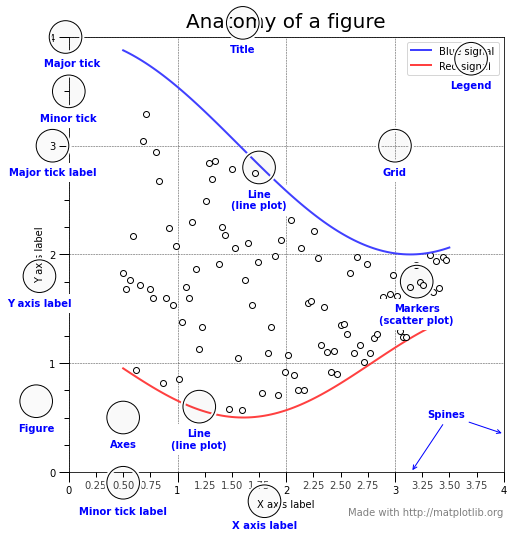

In [14]:
# This figure shows the name of several matplotlib elements composing a figure

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter


np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

[Return to Top](#Contents)  
<a id='Integral-Example'></a>
## Integral Example
(Shaded region and text labels)

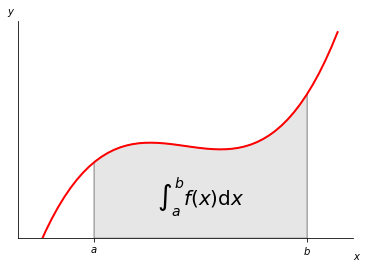

In [69]:
"""
Plot demonstrating the integral as the area under a curve.

Although this is a simple example, it demonstrates some important tweaks:

    * A simple line plot with custom color and line width.
    * A shaded region created using a Polygon patch.
    * A text label with mathtext rendering.
    * figtext calls to label the x- and y-axes.
    * Use of axis spines to hide the top and right spines.
    * Custom tick placement and labels.
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def func(x):
    return (x-3) * (x-5) * (x-7) + 85
a,b = 2, 9
x = np.linspace(0,10)
y = func(x)

fig, ax = plt.subplots(1)
ax.plot(x, y, 'r', linewidth=2)
ax.set_ylim(ymin=0)

# Make the shaded region
ix = np.linspace(a,b)
iy = func(ix)
verts = [(a,0)] + list(zip(ix, iy)) + [(b,0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

# Add the function text
ax.text(0.5 * (a + b), 30, r"$\int_a^b f(x)\mathrm{d}x$",
         horizontalalignment='center', fontsize=20)

# Add the axis labels
fig.text(0.9, 0.05, '$x$')
fig.text(0.1, 0.9, '$y$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([])

plt.show()


[Return to Top](#Contents)  
<a id='ToDo'></a>
## Things To Add
- axhline and axvline examples
- Combine legends with twinx()
- Advanced gridspec layouts like the ones from [here](https://towardsdatascience.com/plot-organization-in-matplotlib-your-one-stop-guide-if-you-are-reading-this-it-is-probably-f79c2dcbc801#:~:text=%20Plot%20Organization%20in%20matplotlib%20%E2%80%94%20Your%20One-stop,axes.%20The%20distinction%20between%20subplots%20and...%20More%20)
- Add description of zorder to the 'anatomy of a plot' so I don't forget which way they're stacked.
- Grid options
- Style options
> `plt.style.available`
> `plt.style.use('classic')`
- Saving pictures
> `fig.canvas.get_supported_filetypes()`  
> `fig.savefig('sales.png', transparent=False, dpi=80, bbox_inches="tight")`  
- Examples from [here](https://towardsdatascience.com/a-step-by-step-guide-for-creating-advanced-python-data-visualizations-with-seaborn-matplotlib-1579d6a1a7d0)  


